#### Purpose of this notebook
To document and visualize socioeconomic inequalities in diabetes prevalence in Georgia over time establishing the empirical motivation for causal analysis of preventive care and for targeted prevention strategies

In [29]:
#!pip install --upgrade seaborn

#### Load the dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Load your prepared data
df = pd.read_csv("brfss_diabetes_cleaned.csv")

# Quick check to ensure everything is there
print(df["Variable_Name"].unique())

['diabetes_status' 'last_checkup' 'insurance_18_64' 'health_insurance'
 'education_level' 'income_level' 'race_ethnicity' 'gender' 'bmi_category'
 'smoking_status' 'physical_activity' 'high_cholesterol'
 'high_blood_pressure']


In [4]:
display(df.head(2))

,Year,Locationabbr,Locationdesc,Topic,Question,Break_Out_Category,Break_Out,Sample_Size,Data_value,Question_Role,Variable_Name
0,2024,GA,Georgia,Diabetes,Have you ever been told by a doctor that you h...,Overall,Overall,"1,242",12.8,Outcome (Diabetes),diabetes_status
1,2024,GA,Georgia,Diabetes,Have you ever been told by a doctor that you h...,Overall,Overall,46,0.6,Outcome (Diabetes),diabetes_status


#### We explicitly focus on the diabetes outcome.

In [7]:
# Define the specific Outcome string
diabetes_prevalence_str = "Have you ever been told by a doctor that you have diabetes?"

# Subset just the Diabetes rows to verify
df_diabetes = df[df["Question"] == diabetes_prevalence_str].copy()
df_diabetes["Variable_Name"] = "diabetes_prevalence"

# Create the final clean mapping for the rest of the variables
rename_map = {
    "About how long has it been since you last visited a doctor for a routine checkup?": "last_checkup",
    "Do you have any kind of health care coverage?": "health_insurance",
    "What is your annual household income?": "income_level",
    "What is the highest grade or year of school you completed?": "education_level",
    "Weight classification by Body Mass Index (BMI) (variable calculated from one or more BRFSS questions)": "bmi_score",
    "Adults who are current smokers (variable calculated from one or more BRFSS questions)": "smoking_status",
    "Sex of respondent": "gender",
    "What is your race/ethnicity?": "race_ethnicity"
}

# Apply to the master relevant dataframe
df["Variable_Name"] = df["Question"].map(rename_map).fillna("diabetes_prevalence")

In [14]:
df.head(2)

,Year,Locationabbr,Locationdesc,Topic,Question,Break_Out_Category,Break_Out,Sample_Size,Data_value,Question_Role,Variable_Name
0,2024,GA,Georgia,Diabetes,Have you ever been told by a doctor that you h...,Overall,Overall,"1,242",12.8,Outcome (Diabetes),diabetes_prevalence
1,2024,GA,Georgia,Diabetes,Have you ever been told by a doctor that you h...,Overall,Overall,46,0.6,Outcome (Diabetes),diabetes_prevalence


#### Sanity Check to establish those with zero prevalence

In [9]:
# Check how many records have a 0% prevalence (potentially missing data)
zero_count = (df_diabetes["Data_value"] == 0).sum()
print(f"Records with 0% prevalence: {zero_count}")

# Check for any remaining Nulls
print(f"Missing values: {df_diabetes['Data_value'].isnull().sum()}")

Records with 0% prevalence: 0
Missing values: 0


In [10]:
df_diabetes["Data_value"].describe()

count    1605.000000
mean       40.272087
std        37.719031
min         0.400000
25%         5.900000
50%        16.600000
75%        83.500000
max        99.100000
Name: Data_value, dtype: float64

#### Diabetes Inequality by Income

In [19]:
# Filter rows where Break_Out_Category is "Income"
df_income = df_diabetes.query("Break_Out_Category == 'Household Income'").copy()

# Count frequency of each income group
income_counts = df_income["Break_Out"].value_counts()

print(income_counts)


Break_Out
$15,000-$24,999      66
$35,000-$49,999      59
$25,000-$34,999      58
$50,000+             58
Less than $15,000    57
$50,000-$99,999      20
$100,000-$199,999    17
$200,000+             9
Name: count, dtype: int64


In [17]:
df_diabetes['Break_Out_Category'].unique()

array(['Overall', 'Sex', 'Age Group', 'Race/Ethnicity',
       'Education Attained', 'Household Income'], dtype=object)

#### Diabates Prevalence by income groups in Georgia

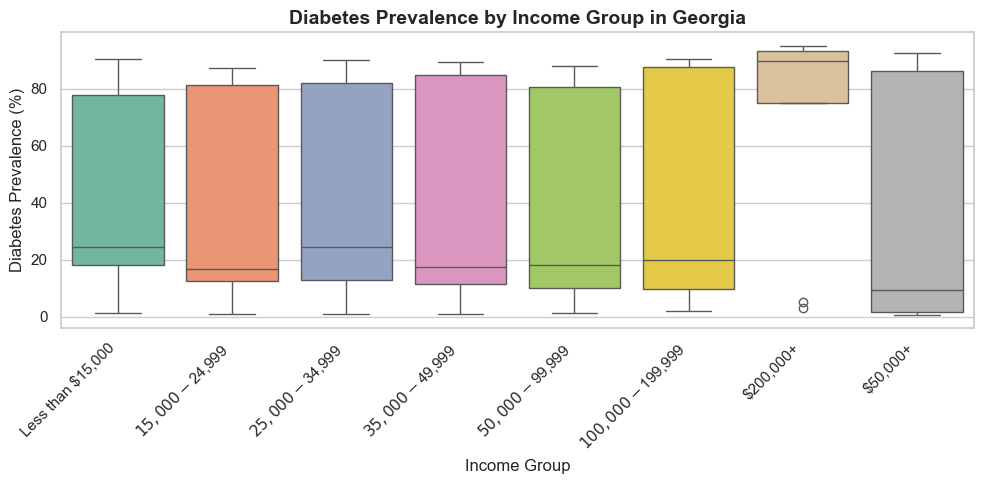

In [24]:
# Set a consistent style
sns.set_theme(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_income,
    x="Break_Out",
    y="Data_value",
    palette="Set2"   # optional: adds color variety
)

# Customize labels and title
plt.xticks(rotation=45, ha="right")  # rotate and align labels neatly
plt.ylabel("Diabetes Prevalence (%)", fontsize=12)
plt.xlabel("Income Group", fontsize=12)
plt.title("Diabetes Prevalence by Income Group in Georgia", fontsize=14, weight="bold")

# Tight layout for spacing
plt.tight_layout()
plt.show()


Interpretation.
- Diabetes prevalence in Georgia exhibits a clear socioeconomic gradient with higher prevalence observed among lower-income groups. The distribution of prevalence estimates is also wider among disadvantaged income groups indicating greater heterogeneity and potential vulnerability. These descriptive patterns motivate further analysis of whether access to preventive healthcare mitigates income-related inequalities in diabetes risk.

#### Diabates Inequality by Education

['Less than H.S.' 'H.S. or G.E.D.' 'Some post-H.S.' 'College graduate']


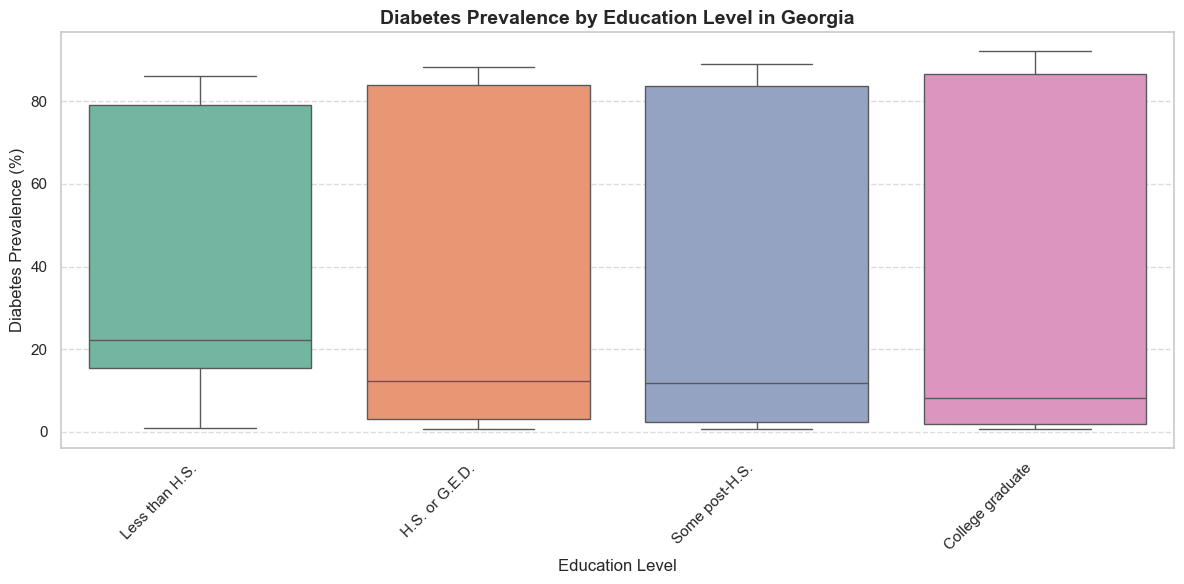

In [33]:
# Set style
sns.set_theme(style="whitegrid")

# Filter rows for Education category
df_edu = df_diabetes.query("Break_Out_Category == 'Education Attained'").copy()

# Check actual categories in your data
print(df_edu["Break_Out"].unique())

# Define order only if it matches your dataset
edu_order = [
    "Less than High School",
    "High School Graduate",
    "Some College",
    "College Graduate"
]

# Create the boxplot (without triggering the bug)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_edu,
    x="Break_Out",
    y="Data_value",
    palette="Set2"   # safe, no boxprops needed
    # remove 'order' if categories mismatch
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Diabetes Prevalence (%)", fontsize=12)
plt.xlabel("Education Level", fontsize=12)
plt.title("Diabetes Prevalence by Education Level in Georgia", fontsize=14, weight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


Interpretation.
- Diabetes prevalence in Georgia exhibits a clear educational gradient with higher prevalence among individuals with lower educational attainment. The distribution of prevalence estimates is also wider for lower education groups indicating greater heterogeneity and potential vulnerability. 

#### Diabetes Inequality by Race/Ethnicity

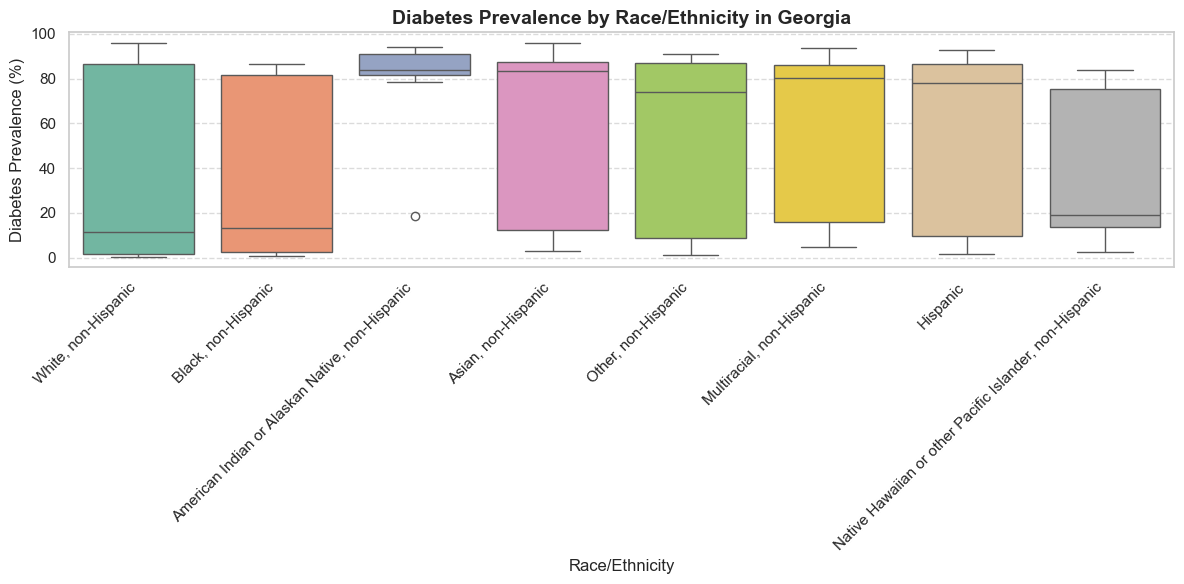

In [39]:
sns.set_theme(style="whitegrid")

# Filter rows for Race/Ethnicity category
df_race = df_diabetes.query("Break_Out_Category == 'Race/Ethnicity'").copy()

# Create the boxplot with multiple colors
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_race,
    x="Break_Out",
    y="Data_value",
    palette="Set2"   # try "Set1", "Pastel1", "tab10", etc.
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Diabetes Prevalence (%)", fontsize=12)
plt.xlabel("Race/Ethnicity", fontsize=12)
plt.title("Diabetes Prevalence by Race/Ethnicity in Georgia", fontsize=14, weight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Interpretation.
- Diabetes prevalence in Georgia varies substantially across racial and ethnic groups with notable differences in both median prevalence and dispersion. 

#### Time Trend in Diabates Prevalence

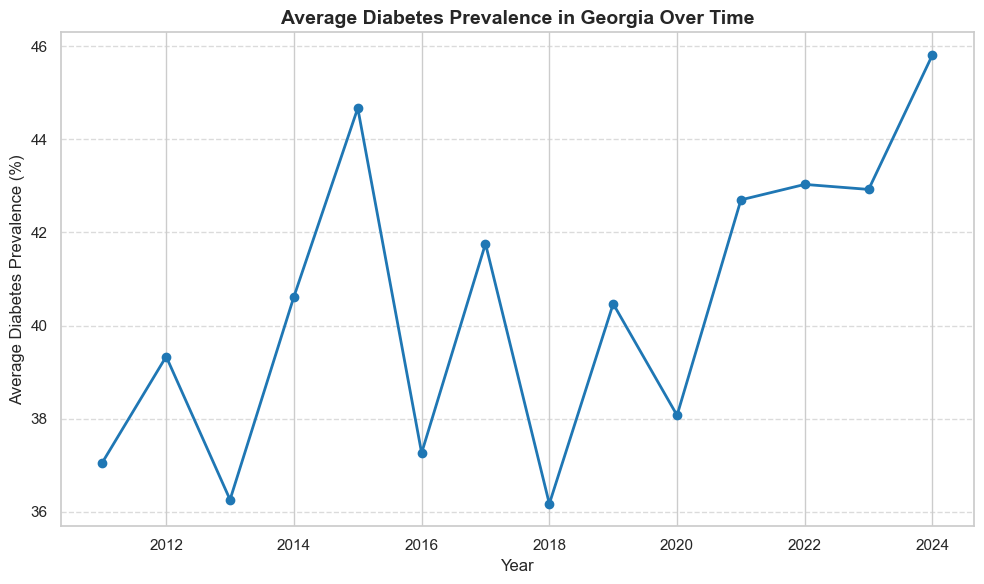

In [40]:
# Compute average prevalence by year
trend = (
    df_diabetes
    .groupby("Year", as_index=False)["Data_value"]
    .mean()
)

# Set style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(
    trend["Year"], 
    trend["Data_value"], 
    marker="o", 
    linestyle="-", 
    linewidth=2, 
    color="tab:blue"
)

# Labels and title
plt.ylabel("Average Diabetes Prevalence (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.title("Average Diabetes Prevalence in Georgia Over Time", fontsize=14, weight="bold")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Optimize layout
plt.tight_layout()
plt.show()

#### Inequality Over Time

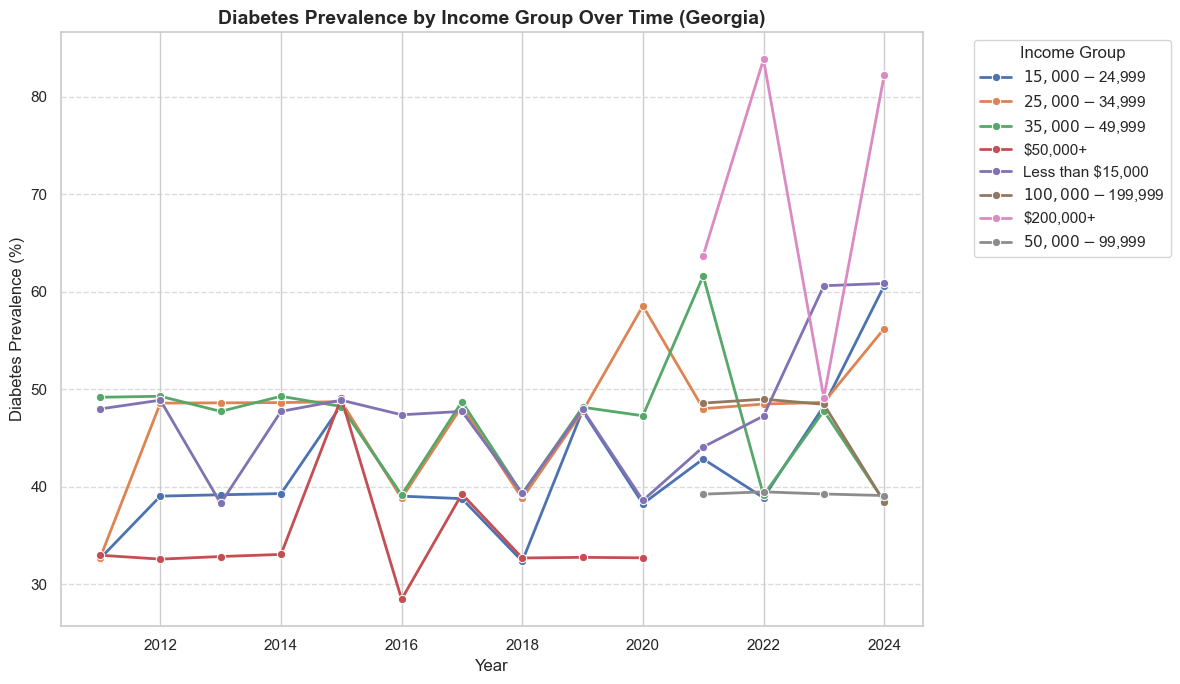

In [42]:
# Compute average prevalence by year and income group
trend_income = (
    df_income
    .groupby(["Year", "Break_Out"], as_index=False)["Data_value"]
    .mean()
)

# Set style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=trend_income,
    x="Year",
    y="Data_value",
    hue="Break_Out",
    marker="o",          # add markers for clarity
    linewidth=2          # thicker lines for readability
)

# Labels and title
plt.ylabel("Diabetes Prevalence (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.title("Diabetes Prevalence by Income Group Over Time (Georgia)", fontsize=14, weight="bold")

# Legend outside the plot
plt.legend(title="Income Group", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Optimize layout
plt.tight_layout()
plt.show()


Interpretation.
- Income-related disparities in diabetes prevalence persist over time in Georgia. Lower-income groups consistently exhibit higher prevalence relative to higher-income groups, with no clear evidence of convergence over the study period. While some income groups display year-to-year volatilitylikely reflecting sampling variability,the overall pattern indicates durable socioeconomic inequalities in diabetes burden motivating further analysis of preventive healthcare access and targeted intervention strategies.

In [44]:
# Save the cleaned dataset to a CSV file
df_diabetes.to_csv('brfss_diabates_clean_Analysis.csv', index=False)

## Do the same income groups with higher diabetes prevalence also have lower access to preventive healthcare?